# 🛍️CUSTOMER SEGMENTATION USING UNSUPERVISED MACHINE LEARNING

### OBJECTIVE:

#### This project aims to segment our customers based on thier characteristics. The goal is to help businesses identify different customer groups and design targeted marketing strategies.

## 1.IMPORT BASIC DEPENDENCIES

In [32]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## 2.LOAD DATASET

In [33]:
df = pd.read_csv(r"C:\Users\user\Music\FINAL_PROJECTS\PROJECT2_CUSTOMER_SEGMENTATION\Final_Project_2 Mall_Customer_Dataset.csv")

In [34]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## 3.UNDERSTANDING THE DATASET

In [35]:
df.shape

(200, 5)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [37]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [38]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [39]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

## 4.DATA PREPROCESSING

### 4.1.ENCODING GENDER COLUMN

In [40]:
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})
#df.rename(columns={'Genre': 'Gender'}, inplace=True)

In [41]:
df['Gender'].unique()

array([0, 1])

In [42]:
df.sample(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
32,33,0,53,33,4
83,84,1,46,54,44
35,36,1,21,33,81
133,134,1,31,72,71
39,40,1,20,37,75


## 5.EXPLORATORY DATA ANALYSIS(EDA)

### 5.1.GENDER DISTRIBUTION

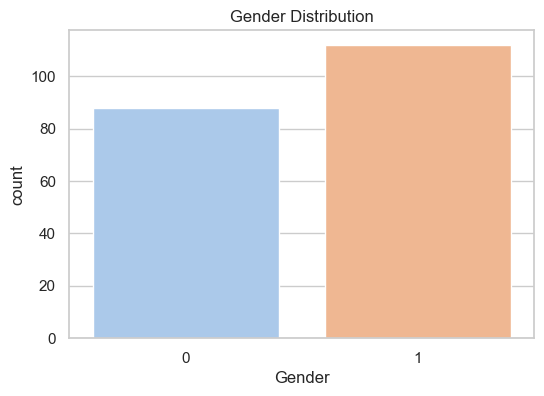

In [43]:
# Style
sns.set(style="whitegrid")

# 1. Gender Distribution
plt.figure(figsize=(6,4))
sns.countplot(x="Gender", data=df, palette="pastel")
plt.title("Gender Distribution")
plt.savefig("Gender_Distribution")
plt.show()

### INSIGHTS:

Around 87–90 males (0) in the dataset.

Around 110–115 females (1) in the dataset.

The dataset has slightly more female customers than male customers.

### 5.2.AGE DISTRIBUTION

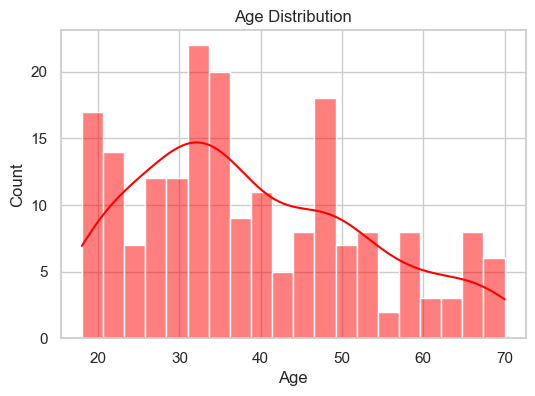

In [44]:
plt.figure(figsize=(6,4))
sns.histplot(df["Age"], bins=20, kde=True, color="red")
plt.title("Age Distribution")
plt.xlabel("Age")
plt.savefig("age_distribution")
plt.show()


### INSIGHTS:

Majority of customers are between 20 and 40 years old.

Peaks around 30–35 years.

Fewer customers are above 55 years, and very few above 65.

Younger adults (18–25) also form a noticeable group, but not as large as the 30s segment.

### 5.3.SPENDING SCORE DISTRIBUTION

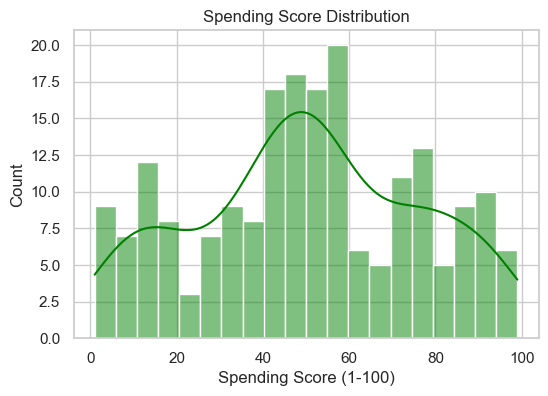

In [45]:

plt.figure(figsize=(6,4))
sns.histplot(df["Spending Score (1-100)"], bins=20, kde=True, color="green")
plt.title("Spending Score Distribution")
plt.xlabel("Spending Score (1-100)")
plt.savefig("spending_score")
plt.show()

### INSIGHTS:

Middle range (40–60) has the highest concentration of customers.Most customers are moderate spenders.

There are also smaller groups at the very low (0–20) and very high (80–100) ends.This shows both frugal and premium customers exist.

The distribution is not perfectly uniform; it leans towards a mid-high cluster around 50.

### 5.4.AGE VS SPENDING SCORE BY GENDER

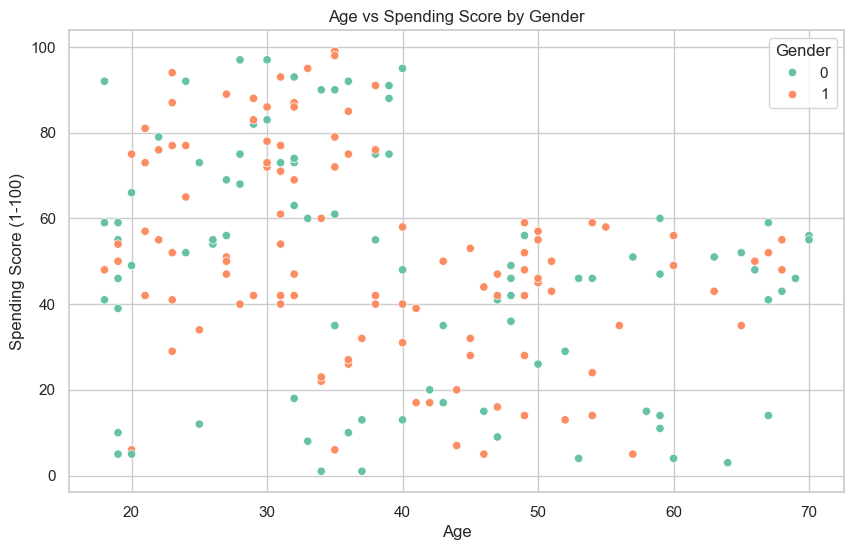

In [46]:

plt.figure(figsize=(10,6))
sns.scatterplot(x="Age", y="Spending Score (1-100)", hue="Gender", data=df, palette="Set2")
plt.title("Age vs Spending Score by Gender")
plt.savefig("Age_vs_Spending Score_by_Gender")
plt.show()

### INSIGHTS:

Younger customers (<35) show a wide range of spending scores (both low and very high spenders).Many young customers are among the top spenders (80–100).

Middle-aged customers (35–50) are more concentrated in the moderate spending range (40–60).

Older customers (50+) mostly fall in the low-to-mid spending range (<50).

Gender pattern:

Both genders are spread across all ranges, but females (orange) appear slightly more represented in higher spending scores.

### 5.5.INCOME VS SPENDING SCORE BY GENDER

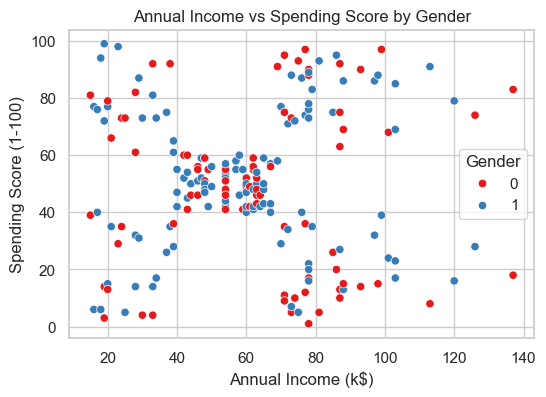

In [47]:

plt.figure(figsize=(6,4))
sns.scatterplot(x="Annual Income (k$)", y="Spending Score (1-100)", hue="Gender", data=df, palette="Set1")
plt.title("Annual Income vs Spending Score by Gender")
plt.savefig("Annual_Income_vs_Spending_Score_by_Gender")
plt.show()

### INSIGHTS

#### Gender Distribution:

Both men and women are spread across clusters.

No strong gender bias, though females (blue) appear slightly more in higher spending ranges.

#### Spending patterns differ by income:

Not all high-income customers spend more (a segment of wealthy low spenders is clearly visible).

Some low-income customers spend a lot, showing lifestyle-driven purchasing rather than income-driven.

In [48]:
df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,0,19,15,39
1,2,0,21,15,81
2,3,1,20,16,6
3,4,1,23,16,77
4,5,1,31,17,40


In [49]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

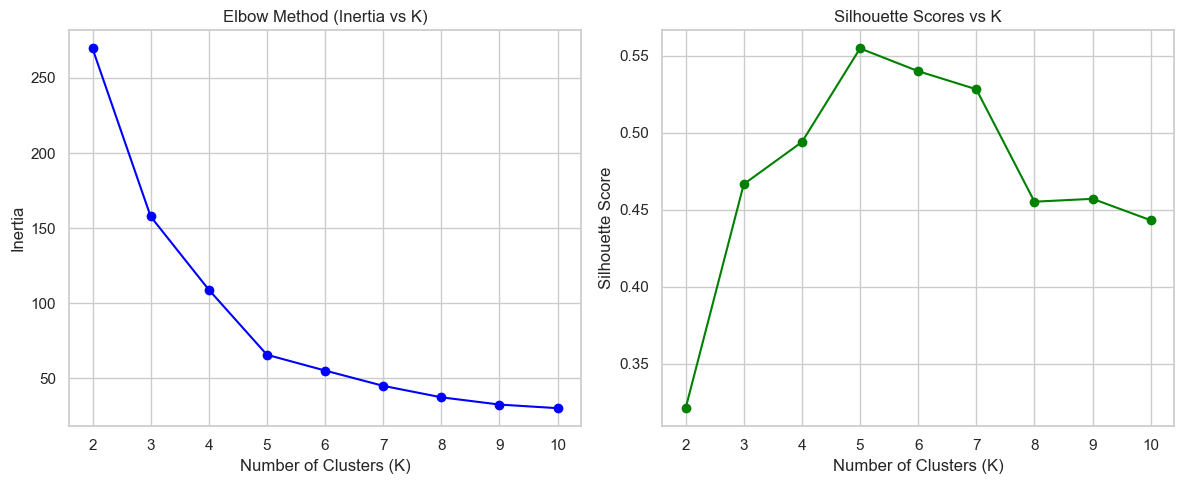

Optimal number of clusters (K): 5


In [50]:
from sklearn.preprocessing import StandardScaler

X = df[['Annual Income (k$)', 'Spending Score (1-100)']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)



# -------------------------------
# Elbow Method & Silhouette Score (Subplots)
# -------------------------------

inertias = []
sil_scores = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)
    inertias.append(kmeans.inertia_)
    sil_scores.append(silhouette_score(X_scaled, labels))

# 4. Plot subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Elbow Plot
axes[0].plot(K_range, inertias, 'o-', color='blue')
axes[0].set_title("Elbow Method (Inertia vs K)")
axes[0].set_xlabel("Number of Clusters (K)")
axes[0].set_ylabel("Inertia")

# Silhouette Plot
axes[1].plot(K_range, sil_scores, 'o-', color='green')
axes[1].set_title("Silhouette Scores vs K")
axes[1].set_xlabel("Number of Clusters (K)")
axes[1].set_ylabel("Silhouette Score")

plt.tight_layout()
plt.savefig("both")
plt.show()

# 5. Best K
best_k = K_range[np.argmax(sil_scores)]
print("Optimal number of clusters (K):", best_k)


### Left: Elbow Method (Inertia vs K)
As K increases, inertia decreases.
The “elbow point” around K = 5 shows the best trade-off between cluster accuracy and simplicity.

### Right: Silhouette Scores vs K
Best score (~0.55) at K = 5.
Scores drop beyond K > 7 → over-clustering.

#### Both Elbow Method and Silhouette Score agree that the optimal number of clusters is 5.

#### This validates your final segmentation of customers into five distinct groups.

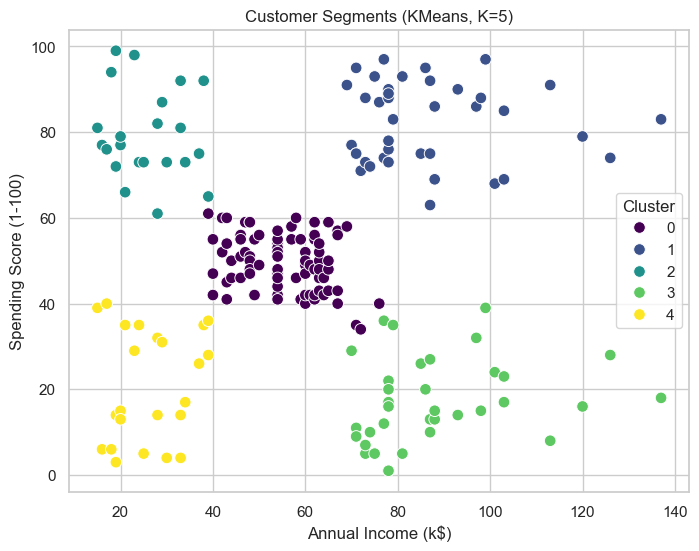

In [51]:
# Final KMeans model
kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=25)
df['KMeans_Cluster'] = kmeans.fit_predict(X_scaled)



# 5. Visualize clusters
plt.figure(figsize=(8,6))
sns.scatterplot(x=df['Annual Income (k$)'], y=df['Spending Score (1-100)'],hue=df['KMeans_Cluster'], palette="viridis", s=70)
plt.title(f"Customer Segments (KMeans, K={best_k})")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend(title="Cluster")
plt.savefig("clusters")
plt.show()

In [52]:

# Cluster Summary
print("\n--- Cluster Profiles ---")
print(df.groupby("KMeans_Cluster")[['Annual Income (k$)', 'Spending Score (1-100)']].mean())


--- Cluster Profiles ---
                Annual Income (k$)  Spending Score (1-100)
KMeans_Cluster                                            
0                        55.296296               49.518519
1                        86.538462               82.128205
2                        25.727273               79.363636
3                        88.200000               17.114286
4                        26.304348               20.913043


#### Cluster 0 (Purple) → Mid-Income, Mid-Spenders(Balanced Customers)
Largest group.

Average income, average spending → steady but not extreme.

#### Cluster 1 (Dark Blue) → High Income, High Spenders(Premium Customers)

Wealthy customers.

Drive high revenue despite being smaller in number.

#### Cluster 2 (Green) → High Income, Low Spenders(Cautious High Earners)

Wealthy but conservative with spending.

Huge untapped potential.

#### Cluster 3 (Teal) → Low Income, High Spenders(Impulsive Buyers)

Limited income but willing to spend more.

Likely younger, lifestyle-driven customers.

#### Cluster 4 (Yellow) → Low Income, Low Spenders(Budget Customers)

Lowest spending power.

Not highly profitable, but still part of customer base.


In [53]:
df.sample(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),KMeans_Cluster
54,55,1,50,43,45,0
196,197,1,45,126,28,3
5,6,1,22,17,76,2
122,123,1,40,69,58,0
125,126,1,31,70,77,1
156,157,0,37,78,1,3
79,80,1,49,54,42,0
61,62,0,19,46,55,0
6,7,1,35,18,6,4
42,43,0,48,39,36,4


In [54]:

from sklearn.cluster import DBSCAN

DBSCAN Clusters found: {np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(-1)}


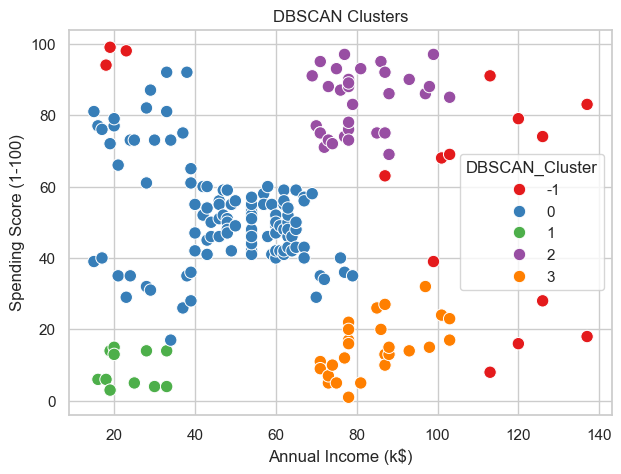

In [55]:
# --- A) DBSCAN ---
dbscan = DBSCAN(eps=0.4, min_samples=5)  
db_labels = dbscan.fit_predict(X_scaled)
df['DBSCAN_Cluster'] = db_labels

print("DBSCAN Clusters found:", set(db_labels))

plt.figure(figsize=(7,5))
sns.scatterplot(x=df['Annual Income (k$)'], y=df['Spending Score (1-100)'],
                hue=df['DBSCAN_Cluster'], palette="Set1", s=80)
plt.title("DBSCAN Clusters")
plt.savefig("dbscan")
plt.show()


In [56]:

dbscan = DBSCAN(eps=0.4, min_samples=5)  
db_labels = dbscan.fit_predict(X_scaled)

# Cluster Summary
print("\n--- Cluster Profiles ---")
print(df.groupby("DBSCAN_Cluster")[['Annual Income (k$)', 'Spending Score (1-100)']].mean())


--- Cluster Profiles ---
                Annual Income (k$)  Spending Score (1-100)
DBSCAN_Cluster                                            
-1                       96.133333               61.800000
 0                       48.304348               51.730435
 1                       23.727273                8.909091
 2                       80.875000               83.625000
 3                       83.925926               14.444444


### Cluster 0 (Blue) — Main Dense Cluster

Contains the largest group of customers.

Mostly mid income (30k–70k).

Spending score varies widely from low to high.


 Most customers fall into this broad category. They display typical mall behavior.

 ### Cluster 2 (Orange) — Low Spending High Income Group

Customers with high income (80k–120k).

Spending score is very low.

These are high earners but cautious/low spenders.

### Cluster 3 (Purple) — High Income, High Spending

Customers with high income.

High spending scores.

These are your premium customers.

### Cluster 1 (Green) — Low Income, Low Spending

Very low income group.

Very low spending score.

These are budget customers.

### Cluster -1 (Red) — Noise / Outliers

Points that do not belong to any cluster because:

They are too far from any dense region

These are irregular shoppers or atypical customers.

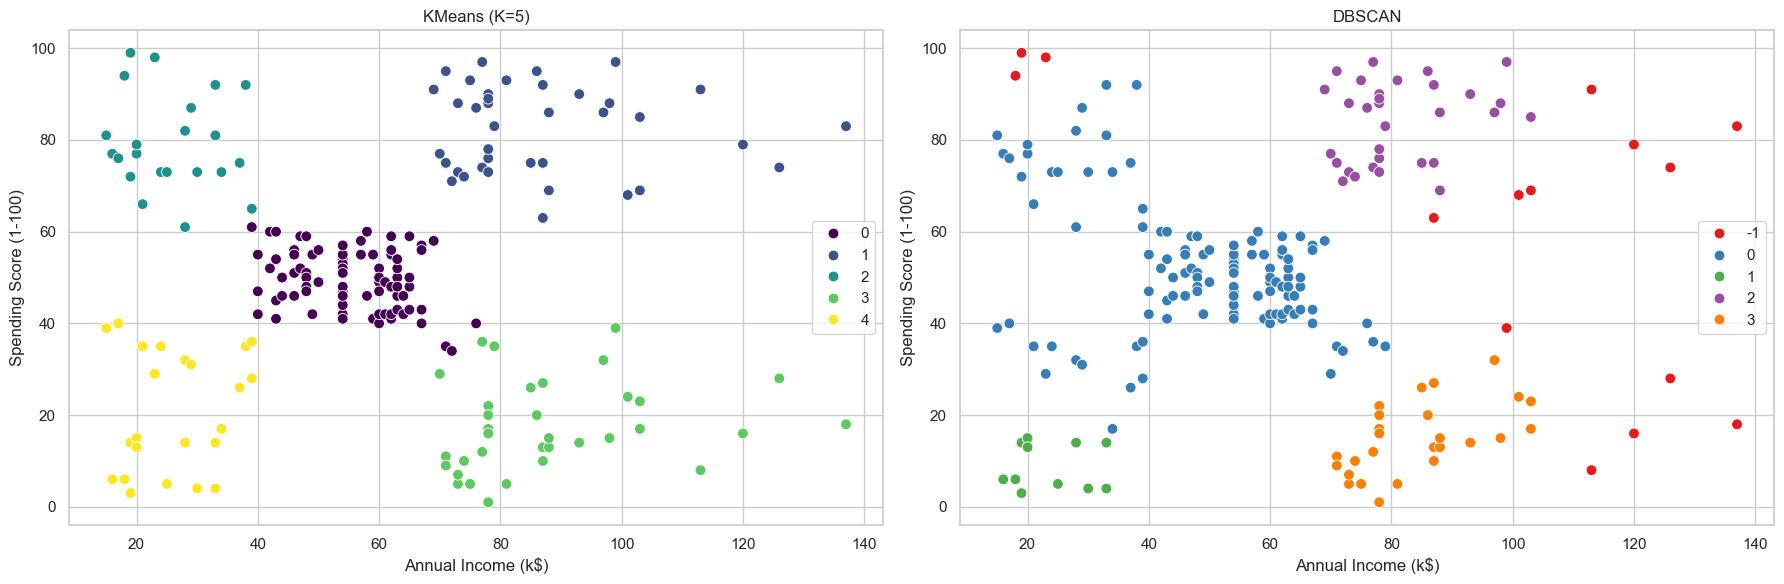

KMeans → Silhouette: 0.5546571631111091 | Davies-Bouldin: 0.5722356162263352
DBSCAN → Silhouette: 0.41325830390002166 | Davies-Bouldin: 1.421088125095285


In [57]:
# --------------------------------------
# Subplot Comparison: KMeans, DBSCAN
# --------------------------------------

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score


# 1. Prepare scaled features
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 2. KMeans with best_k from earlier (you can replace best_k if needed)
best_k = 5  # replace if you already computed optimal K
kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=25)
kmeans_labels = kmeans.fit_predict(X_scaled)

# 3. DBSCAN
dbscan = DBSCAN(eps=0.4, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)


# 5. Create Subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# KMeans Plot
sns.scatterplot(ax=axes[0],
                x=df['Annual Income (k$)'], y=df['Spending Score (1-100)'],
                hue=kmeans_labels, palette="viridis", s=60)
axes[0].set_title(f"KMeans (K={best_k})")

# DBSCAN Plot
sns.scatterplot(ax=axes[1],
                x=df['Annual Income (k$)'], y=df['Spending Score (1-100)'],
                hue=dbscan_labels, palette="Set1", s=60)
axes[1].set_title("DBSCAN")


plt.tight_layout()
plt.savefig("plot")
plt.show()

# 6. Evaluation Metrics
print("KMeans → Silhouette:", silhouette_score(X_scaled, kmeans_labels),
      "| Davies-Bouldin:", davies_bouldin_score(X_scaled, kmeans_labels))

if len(set(dbscan_labels)) > 1:
    print("DBSCAN → Silhouette:", silhouette_score(X_scaled, dbscan_labels),
          "| Davies-Bouldin:", davies_bouldin_score(X_scaled, dbscan_labels))
else:
    print("DBSCAN → Not enough valid clusters for metrics")



### Interpretation:

#### K-Means formed compact, well-separated clusters.

#### DBSCAN produced overlapping clusters and higher noise — unsuitable for this dataset.

## Project Summary — Customer Segmentation using Clustering

### Objective

The goal of this project is to perform customer segmentation using clustering algorithms to identify distinct groups of customers based on their purchasing behavior.
This helps businesses target specific customer groups with tailored marketing strategies.

### Dataset

The dataset contains customer information with features such as:

Age

Annual Income (k$)

Spending Score (1–100)

Data was cleaned, scaled, and visualized using EDA (histograms, pairplots, scatterplots).

### Methods Applied

#### Feature Selection:
Used key features — Annual Income and Spending Score — for clustering.

#### Scaling:
Standardized data using StandardScaler.

#### Algorithms Used:

K-Means Clustering (with k = 5, chosen from the Elbow & Silhouette methods)

DBSCAN (Density-Based Spatial Clustering) for comparison

### Model Evaluation

| Metric                   | K-Means | DBSCAN |    Best   |
| :----------------------- | :-----: | :----: | :-------: |
| **Silhouette Score**     |   0.55  |  0.41  |  K-Means |
| **Davies–Bouldin Index** |   0.57  |  1.42  |  K-Means |


### Interpretation:

K-Means formed compact, well-separated clusters.

DBSCAN produced overlapping clusters and higher noise — unsuitable for this dataset.

### Visual Insights

K-Means scatterplots show 5 clear customer segments based on income and spending patterns.

Pairplots confirm separation across Age, Income, and Spending Score.

DBSCAN plots show irregular, mixed clusters and noise points.

### Customer Segments Identified

| Cluster       | Description                        | Behavior                              |
| ------------- | ---------------------------------- | ------------------------------------- |
| **Cluster 0** | Moderate income, moderate spending | Average customers                     |
| **Cluster 1** | Moderate income, high spending     | Target customers (loyal buyers)       |
| **Cluster 2** | High income, low spending          | Potential customers (need engagement) |
| **Cluster 3** | Low income, low spending           | Budget-conscious group                |
| **Cluster 4** | Low income, very low spending      | Minimal buyers / least profitable     |


### Conclusion

The K-Means algorithm performs best for this dataset with Silhouette = 0.55 and DBI = 0.57.

Five distinct customer segments were discovered.

Businesses can use these segments to design personalized marketing campaigns and improve customer engagement.

In [36]:
import joblib
# Save scaler and model
joblib.dump(scaler, "scaler.pkl")
joblib.dump(kmeans, "kmeans_model.pkl")
print("Saved: scaler.pkl & kmeans_model.pkl")

Saved: scaler.pkl & kmeans_model.pkl


In [37]:
import pandas as pd
import joblib

# Load models and data
#customer_data = pd.read_csv("Mall_Customers.csv")
kmeans = joblib.load("kmeans_model.pkl")

def get_cluster_insight(cluster):
    insights = {
        0: "Young, high-income, moderate spenders. Likely to be tech-savvy customers.",
        1: "Low-income, high-spending customers. Good target for promotions.",
        2: "Mid-income, low spenders. Need engagement to increase purchases.",
        3: "High-income, high spenders. Loyal customers worth special offers.",
        4: "Low-income, low spenders. Price-sensitive customers."
    }
    return insights.get(cluster, "No insight available.")

# Take user input
print("📊 Customer Segmentation Insight Generator")
income = float(input("Enter Annual Income (k$): "))
score = float(input("Enter Spending Score (1-100): "))

# Predict cluster
cluster = kmeans.predict([[income, score]])[0]
print(f"\n💡 You belong to Cluster {cluster}.")

# Show insight
insight = get_cluster_insight(cluster)
print(f"Insight: {insight}")

📊 Customer Segmentation Insight Generator


Enter Annual Income (k$):  15
Enter Spending Score (1-100):  15



💡 You belong to Cluster 1.
Insight: Low-income, high-spending customers. Good target for promotions.
